Shape: (517, 13)

Data types:
 X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

Missing values:
 X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64
                 X           Y month  day        FFMC         DMC          DC  \
count   517.000000  517.000000   517  517  517.000000  517.000000  517.000000   
unique         NaN         NaN    12    7         NaN         NaN         NaN   
top            NaN         NaN   aug  sun         NaN         NaN         NaN   
freq           NaN         NaN   184   95         NaN         NaN         NaN   
mean      4.669246    4.299807   NaN  NaN   90.644681  110.872340  547.940039   
std       2.313778    1.229900   NaN  NaN    5.520111   64.046482  248.066

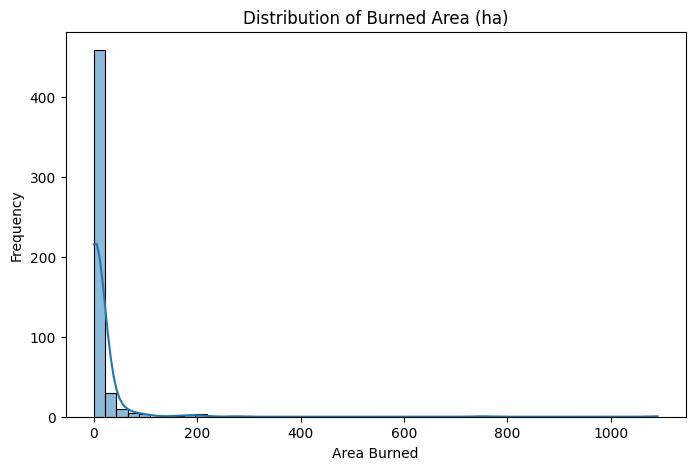

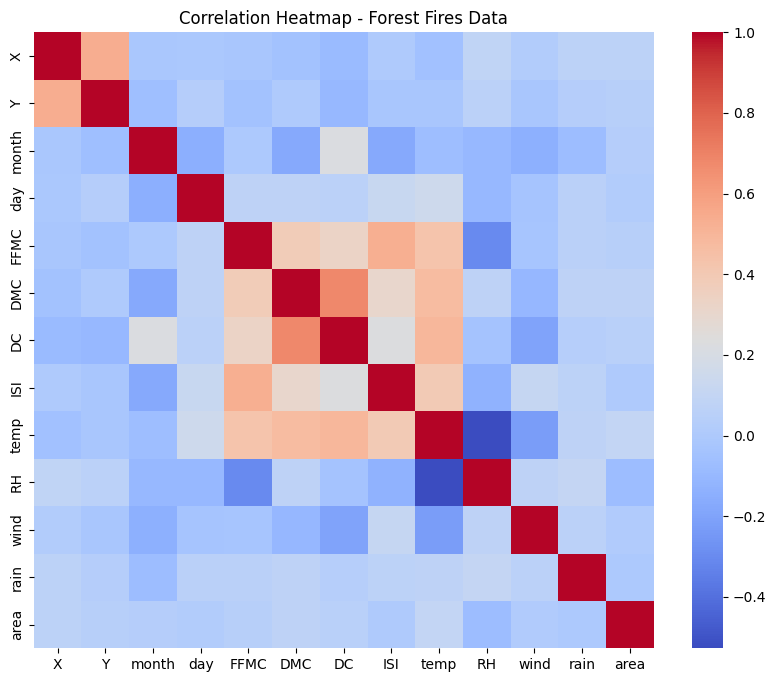

Missing values before imputation:
 X         0
Y         0
month     0
day       0
FFMC      0
DMC       0
DC        0
ISI       0
temp     26
RH        0
wind      0
rain      0
area      0
dtype: int64

Missing values after imputation:
 X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64
Features shape: (517, 12)
Target shape: (517,)
Before scaling:
    X  Y  month  day  FFMC   DMC     DC  ISI       temp  RH  wind  rain
0  7  5      7    0  86.2  26.2   94.3  5.1  18.883299  51   6.7   0.0
1  7  4     10    5  90.6  35.4  669.1  6.7  18.000000  33   0.9   0.0
2  7  4     10    2  90.6  43.7  686.9  6.7  14.600000  33   1.3   0.0
3  8  6      7    0  91.7  33.3   77.5  9.0   8.300000  97   4.0   0.2
4  8  6      7    3  89.3  51.3  102.2  9.6  11.400000  99   1.8   0.0

After scaling:
 [[ 1.00831277  0.56986043  0.28422225 -1.42312073 -0.80595947 -1.32332557
  -1.83047676 -0.8609455

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
df = pd.read_csv(url)
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print(df.describe(include="all"))

plt.figure(figsize=(8,5))
sns.histplot(df['area'], bins=50, kde=True)
plt.title("Distribution of Burned Area (ha)")
plt.xlabel("Area Burned")
plt.ylabel("Frequency")
plt.show()

le = LabelEncoder()
df['month'] = le.fit_transform(df['month'])
df['day'] = le.fit_transform(df['day'])

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap - Forest Fires Data")
plt.show()

df_missing = df.copy()
df_missing.loc[::20, "temp"] = np.nan
print("Missing values before imputation:\n", df_missing.isnull().sum())
imputer = SimpleImputer(strategy="mean")
df_missing['temp'] = imputer.fit_transform(df_missing[['temp']])
print("\nMissing values after imputation:\n", df_missing.isnull().sum())

X = df_missing.drop("area", axis=1)
y = df_missing["area"]
print("Features shape:", X.shape)
print("Target shape:", y.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Before scaling:\n", X.head())
print("\nAfter scaling:\n", X_scaled[:5])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Train set:", X_train.shape, " Test set:", X_test.shape)

final_df = pd.DataFrame(X_scaled, columns=X.columns)
final_df['area'] = y.values
print(final_df.head())
